# Ejercicio SVM

Empezamos cargando las librerías necesarias:

In [34]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

Para trabajar necesitamos un dataset, crearemos uno artificial que sea conveniente a nuestro ejercicio:

In [87]:
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2, 
                           random_state=2, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 3 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

Vamos a visualizar como son estos datos:

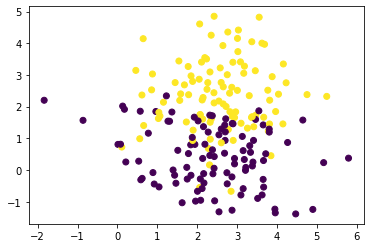

In [88]:
plt.scatter(X[:,0],X[:,1],c=y);


**Pregunta 1**
- Separa el conjunto de datos `X` e `y` en dos conjuntos: entrenamiento y test.
- Entrena una SVM con el paràmetro `C=0.0001`.
- Muestra la matriz de confusión y calcula la precision (tp / (tp + fp)) en la clasificación.

In [89]:
# Preparación de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [111]:
# Clasificación 
clf = LinearSVC(C=0.0001, random_state=0)
clf.fit(X_train, y_train);

y_predict = clf.predict(X_test)

In [112]:
# Metricas
cm = confusion_matrix(y_test, y_predict)
print(cm)
print("precision: ", precision_score(y_test, y_predict))

[[13 19]
 [ 2 32]]
precision:  0.6274509803921569


Vamos a dibujar la recta de decisión sobre el conjunto de test aprovechando que estamos en un problema con 2 características.

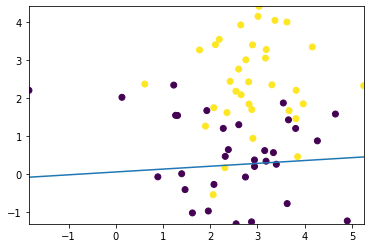

In [113]:
m = -clf.coef_[0][0] / clf.coef_[0][1] # Pendiente de la recta
x1 = (0, -clf.intercept_[0] / clf.coef_[0][1]) # Punto 

plt.axline(xy1=x1, slope=m) # Esta función nos permite dibujar rectas basandonos en la ecuación punto-pendiente
plt.scatter(X_test[:,0],X_test[:,1],c=y_test) # dibujamos los puntos
plt.ylim([X_test[:,1].min(), X_test[:,1].max()]) # limitamos el entorno del dibujo
plt.xlim([X_test[:,0].min(), X_test[:,0]. max()]);

**Pregunta 2**

Repite el mismo proceso pero escalando los valores del conjunto de datos, aprovecha los conjuntos que ya habías obtenido anteriormente:

In [102]:
scs = StandardScaler()
scs.fit(X_train)
X_train_scaled = scs.transform(X_train)
X_test_scaled = scs.transform(X_test)

In [114]:
# Clasificación 
clf = LinearSVC(C=0.0001, random_state=0)
clf.fit(X_train_scaled, y_train);

y_predict = clf.predict(X_test_scaled)

In [116]:
# Metricas
cm = confusion_matrix(y_test, y_predict)
print(cm)

print("precision: ", precision_score(y_test, y_predict))

[[23  9]
 [ 5 29]]
precision:  0.7631578947368421


**Ejercicio 3**

Ahora vamos a ver como afecta la modificación del valor del paràmetro C a la clasificación.


In [184]:
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2, 
                           random_state=2, n_clusters_per_class=1, class_sep= 3,)
rng = np.random.RandomState(2)
X += 6 * rng.uniform(size=X.shape)
linearly_separable = (X, y)


Vuelve a preparar los datos para poder realizar una clasificación: separacion en conjuntos de entrenamiento y test y escalado de los datos:

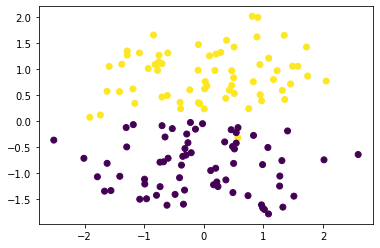

In [185]:
# Preparación de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

scs = StandardScaler()
scs.fit(X_train)
X_train_scaled = scs.transform(X_train)
X_test_scaled = scs.transform(X_test)

plt.scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=y_train);

Ejecuta la siguiente celda y observa como cambia la recta de decisión:

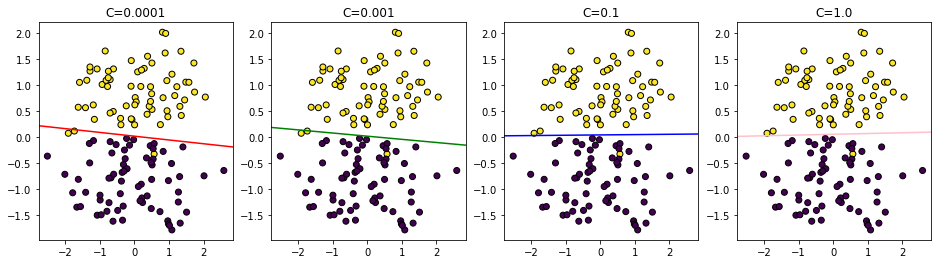

In [189]:
Cs = [ 0.0001, 0.001,0.1, 1.0]

plt.figure(figsize=(16,4))

for idx, C in enumerate(Cs):
    
    clf = LinearSVC(C=C, random_state=0)
    clf.fit(X_train_scaled, y_train)
    y_predict = clf.predict(X_test_scaled)
    
    m = -clf.coef_[0][0] / clf.coef_[0][1]
    x1 = (0, -clf.intercept_[0] / clf.coef_[0][1])
    
    ax = plt.subplot(1, 4, idx + 1)  # Añadimos  la subfigura a una figura mas grande con cuatro columnas
    ax.set_title("C="+ str(C))
    ax.axline(xy1=x1, slope=m,color=colors[idx])
    ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolors="k")